In [27]:
import math
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
lung_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv')

In [10]:

lung_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   group    400 non-null    int64 
 1   patient  400 non-null    object
 2   t1       400 non-null    int64 
 3   t2       400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [12]:
lung_df.head()

,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


In [18]:
lung_df['group'].value_counts()

1    200
3    100
2    100
Name: group, dtype: int64

In [20]:
lung_df = lung_df.assign(diff = lung_df.t2 - lung_df.t1)


In [21]:
lung_df.head()

,group,patient,t1,t2,diff
0,1,1-1,4226,4497,271
1,1,1-2,5731,5665,-66
2,1,1-3,3912,4505,593
3,1,1-4,4811,6472,1661
4,1,1-5,5128,4710,-418


In [22]:
T_1 = lung_df.loc[lung_df['group'] == 1]
T_2 = lung_df.loc[lung_df['group'] == 2]
T_3 = lung_df.loc[lung_df['group'] == 3]
#For each group, is there a significant difference between time 1 and time 2?

In [34]:
print('T_1 t1:', stats.shapiro(T_1['t1']))
print('T_1 t2:', stats.shapiro(T_1['t2']))

print('T_2 t1:', stats.shapiro(T_2['t1']))
print('T_2 t2:', stats.shapiro(T_2['t2']))

print('T_3 t1:', stats.shapiro(T_3['t1']))
print('T_3 t2:', stats.shapiro(T_3['t2']))

T_1 t1: (0.9932351112365723, 0.4915737509727478)
T_1 t2: (0.9955824613571167, 0.8313238024711609)
T_2 t1: (0.994020402431488, 0.9413013458251953)
T_2 t2: (0.9911357164382935, 0.7556766271591187)
T_3 t1: (0.9901381731033325, 0.675767183303833)
T_3 t2: (0.9781965613365173, 0.09609080106019974)


In [35]:
print('T_1 t1 std:', np.std(T_1['t1']))
print('T_1 t2 std:', np.std(T_1['t2']))

print('T_2 t1 std:', np.std(T_2['t1']))
print('T_2 t2 std:', np.std(T_2['t2']))

print('T_3 t1 std:', np.std(T_3['t1']))
print('T_3 t2 std:', np.std(T_3['t2']))

T_1 t1 std: 1053.8174957624299
T_1 t2 std: 1007.0247633375255
T_2 t1 std: 1132.7310183799152
T_2 t2 std: 1097.2471918396511
T_3 t1 std: 942.3098388534421
T_3 t2 std: 973.6588566330614


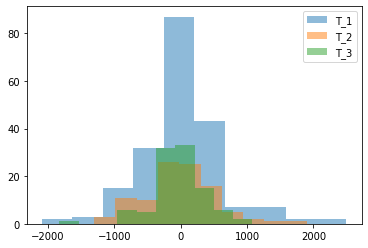

In [30]:
plt.hist(T_1['diff'], alpha=0.5)
plt.hist(T_2['diff'], alpha=0.5)
plt.hist(T_3['diff'], alpha=0.5)
plt.legend(['T_1', 'T_2', 'T_3'])
plt.show()

In [37]:
print(stats.ttest_rel(T_1['t1'], T_1['t2']))


Ttest_relResult(statistic=-0.31827677584963787, pvalue=0.7506087664956842)


In [38]:
print(stats.ttest_rel(T_2['t1'], T_2['t2']))

Ttest_relResult(statistic=0.32745622415118286, pvalue=0.7440142766032991)


In [39]:
print(stats.ttest_rel(T_3['t1'], T_3['t2']))

Ttest_relResult(statistic=0.8984773127301627, pvalue=0.37111115842334486)


In [40]:
tukey = pairwise_tukeyhsd(endog=lung_df['t2'], 
                         groups =lung_df['group'],alpha = 0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,99.705,0.6902,-195.9612,395.3712,False
1,3,-1341.865,0.001,-1637.5312,-1046.1988,True
2,3,-1441.57,0.001,-1782.9759,-1100.1641,True


In [ ]:
#Is there a significant difference in the mean of all groups at time 2?
#significant difference between group 2 and 3, and group 1 and 3, 
#group 3 is significantly different comparing to the other 2 groups